# ROMY - Barometer

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np

from src.baroseis import baroseis


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in la

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/andbro/anaconda3/envs/obs2/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in la

AttributeError: _ARRAY_API not found

In [2]:
# load config
# config = baroseis.load_from_yaml("./config/config_FFBI_ROMY_20240312_file.yaml")
# config = baroseis.load_from_yaml("./config/config_FFBI_ROMY_20240315_file.yaml")
# config = baroseis.load_from_yaml("./config/config_FFBI_ROMY_20240316_file.yaml") # jump
# config = baroseis.load_from_yaml("./config/config_FFBI_ROMY_20240321_file.yaml")
# config = baroseis.load_from_yaml("./config/config_FFBI_ROMY_20240324_file.yaml")
# config = baroseis.load_from_yaml("./config/config_FFBI_ROMY_20240423_file.yaml")
# config = baroseis.load_from_yaml("./config/config_FFBI_ROMY_20240829_file.yaml")


# config = baroseis.load_from_yaml("./config/config_FFBI_ROMY_20240423_file.yaml")
config = baroseis.load_from_yaml("./config/config_FFBI_ROMY_20241002_file.yaml")


In [3]:
date = config['tbeg'].date.strftime("%Y%m%d")
sta = config['seis_seeds'][0].split(".")[1]

In [4]:
# Initialize baroseis object
bs = baroseis(conf=config)

# Load data specified in config
bs.load_data()

Creating new Hilbert transform data...
 -> No resampling required!

>Runtime: 0.0 minutes



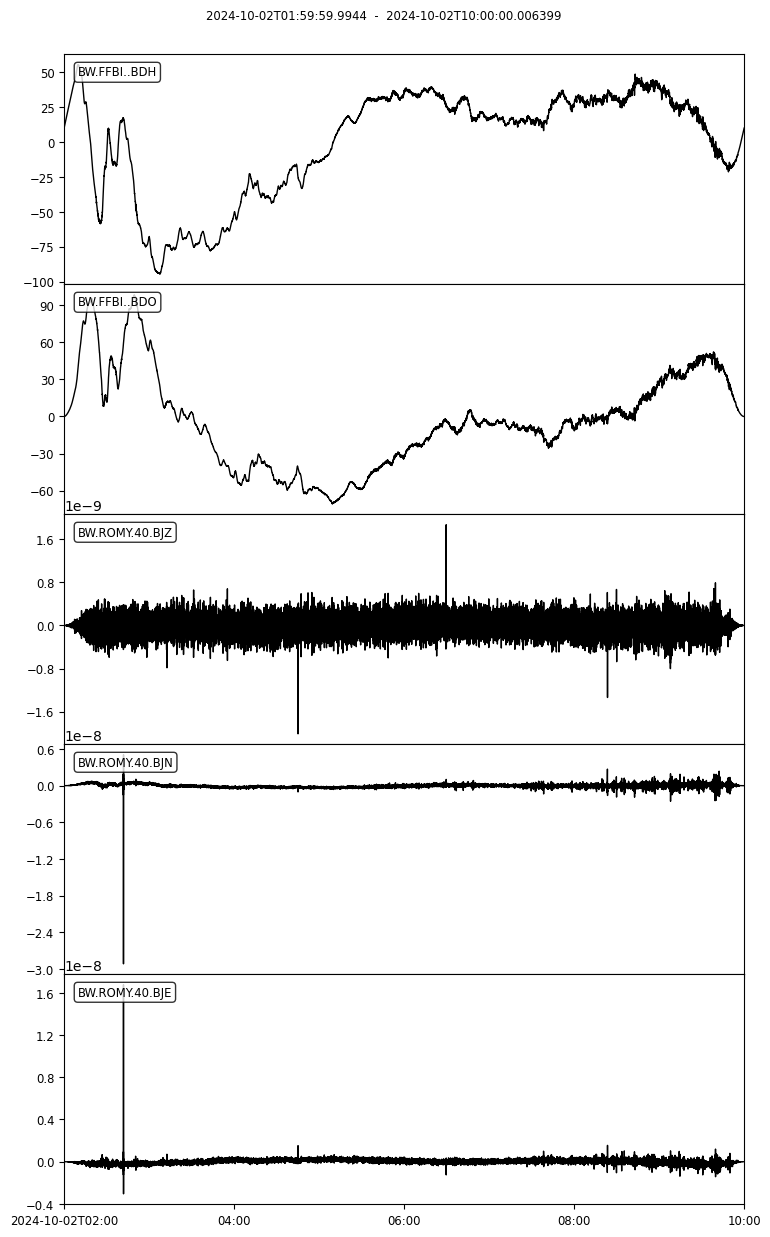

In [5]:
bs.st.plot(equal_scale=False);

In [6]:
# band pass filer
fmin = 5e-4
fmax = 0.01
bs.filter_data(fmin=fmin, fmax=fmax)

# detrend
bs.st.detrend("demean")

# taper edges
bs.st.taper(0.1)


Removing mean and trend...
Applying bandpass filter: 0.0005-0.01 Hz


5 Trace(s) in Stream:
BW.FFBI..BDO   | 2024-10-02T02:00:00.005000Z - 2024-10-02T10:00:00.005000Z | 1.0 Hz, 28801 samples
BW.ROMY.40.BJE | 2024-10-02T01:59:59.994400Z - 2024-10-02T09:59:59.994400Z | 1.0 Hz, 28801 samples
BW.ROMY.40.BJN | 2024-10-02T02:00:00.000599Z - 2024-10-02T10:00:00.000599Z | 1.0 Hz, 28801 samples
BW.ROMY.40.BJZ | 2024-10-02T02:00:00.006399Z - 2024-10-02T10:00:00.006399Z | 1.0 Hz, 28801 samples
BW.FFBI..BDH   | 2024-10-02T02:00:00.005000Z - 2024-10-02T10:00:00.005000Z | 1.0 Hz, 28801 samples

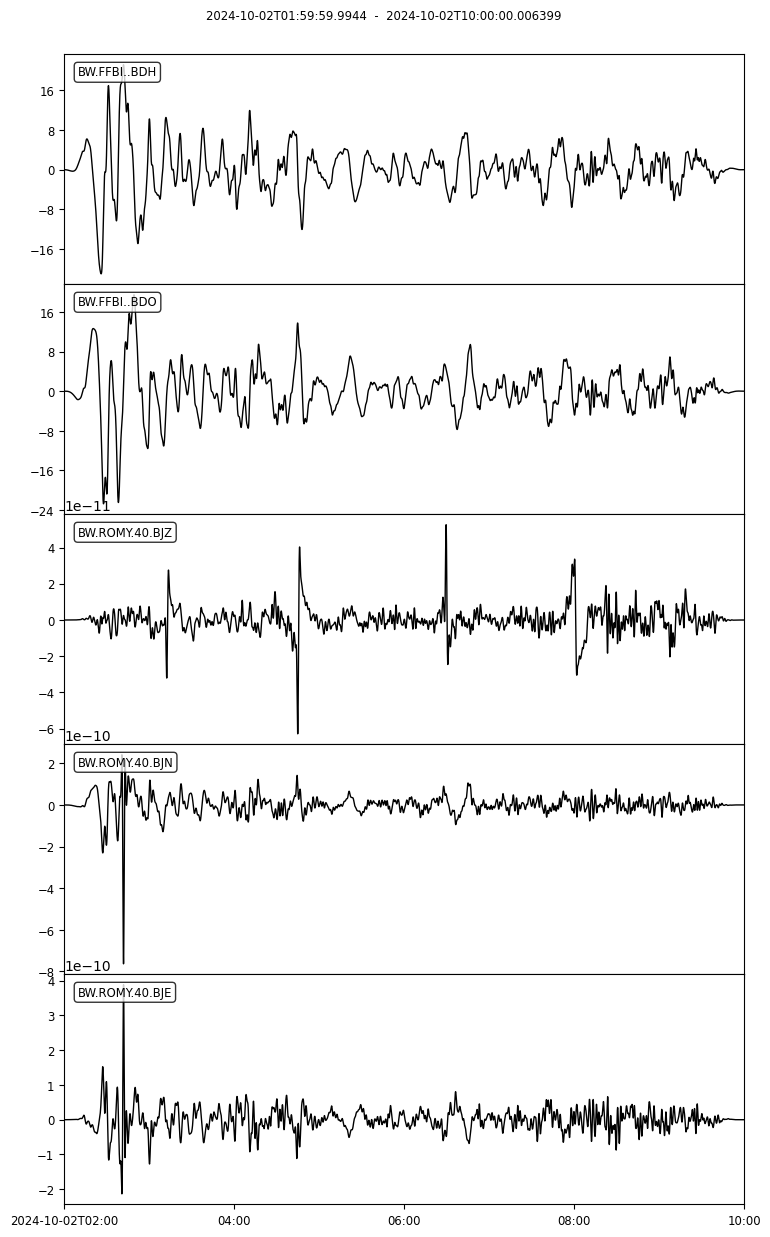

In [7]:
bs.st.plot(equal_scale=False);

 >Integrating ['JZ', 'JN', 'JE']


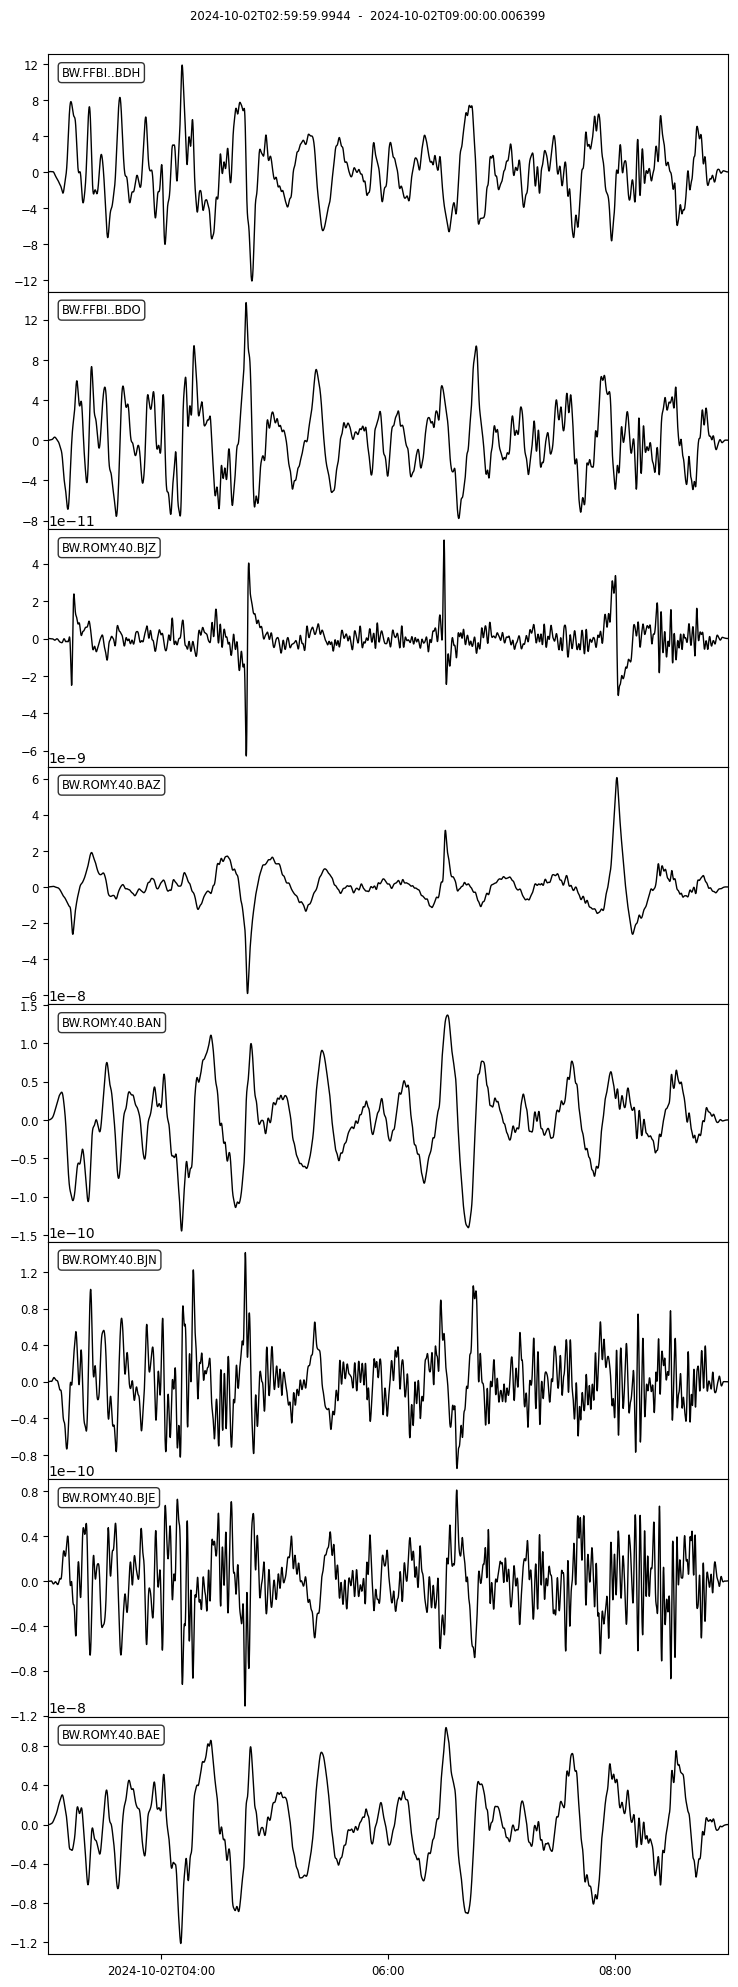

In [8]:

# integrate rotation to tilt
bs.integrate_data(method="cumtrapz") # method = "cumtrapz" or "spline"

# # trim waveforms
bs.st = bs.st.trim(bs.config['tbeg'], bs.config['tend'])

# detrend waveforms
bs.st.detrend("demean")

# taper edges
bs.st.taper(0.05)

# show new waveforms
bs.st.plot(equal_scale=False);


### Compuate and Compare Coherency

In [37]:
Twin = 7200
overlap = 0.5
smooth_points = 0

cha = "A"

date = bs.config['tbeg'].date.strftime("%Y%m%d")

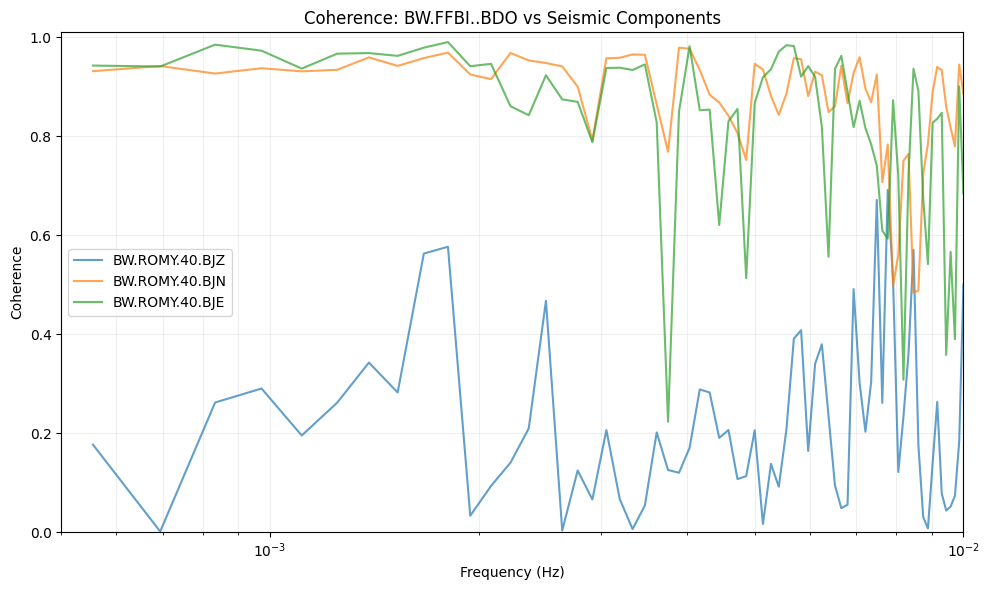

In [38]:
# compute coherence
coherence = bs.compute_coherence(
    window_sec=Twin,  # 1 hour windows
    overlap=overlap,      # 50% overlap
    smooth_points=smooth_points, # Smoothing window
    baro_channel="BDO",
    channels=["BJZ", "BJN", "BJE"]
)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=fmin,
    fmax=fmax,
    out=True,
)

# fig.savefig(f"./figures/{date}/{date}_{sta}_bdo_coherence.png")

# compute coherence
# coherence = bs.compute_coherence(
#     window_sec=Twin,  # 1 hour windows
#     overlap=overlap,      # 50% overlap
#     smooth_points=smooth_points, # Smoothing window
#     baro_channel="BDH",
#     channels=["BJZ", "BJN", "BJE"]

# )

# # plot results
# fig = bs.plot_coherence(
#     coherence,
#     fmin=0.0005,
#     fmax=0.1,
#     out=True,
# )

# fig.savefig(f"./figures/{date}/{date}_{sta}_bdh_coherence.png")


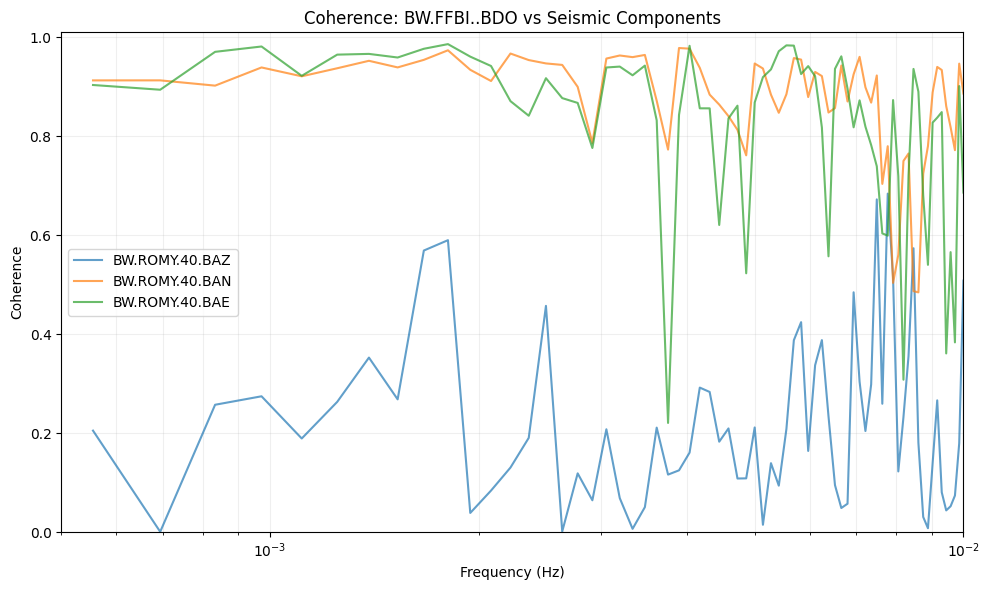

In [39]:
# compute coherence
coherence = bs.compute_coherence(
    window_sec=Twin,  # 1 hour windows
    overlap=overlap,      # 50% overlap
    smooth_points=smooth_points, # Smoothing window
    baro_channel="BDO",
    channels=["BAZ", "BAN", "BAE"]
)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=fmin,
    fmax=fmax,
    out=True,
)

# fig.savefig(f"./figures/{date}/{date}_{sta}_bdo_coherence.png")

# compute coherence
# coherence = bs.compute_coherence(
#     window_sec=Twin,  # 1 hour windows
#     overlap=overlap,      # 50% overlap
#     smooth_points=smooth_points, # Smoothing window
#     baro_channel="BDH",
#     channels=["BAZ", "BAN", "BAE"]

# )

# # plot results
# fig = bs.plot_coherence(
#     coherence,
#     fmin=fmin,
#     fmax=fmax,
#     out=True,
# )

# fig.savefig(f"./figures/{date}/{date}_{sta}_bdh_coherence.png")


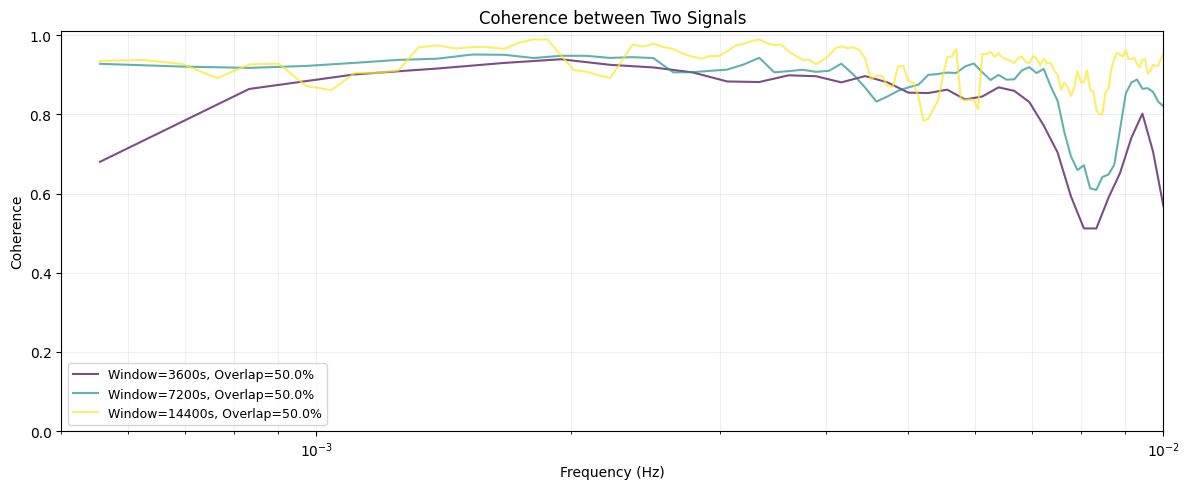

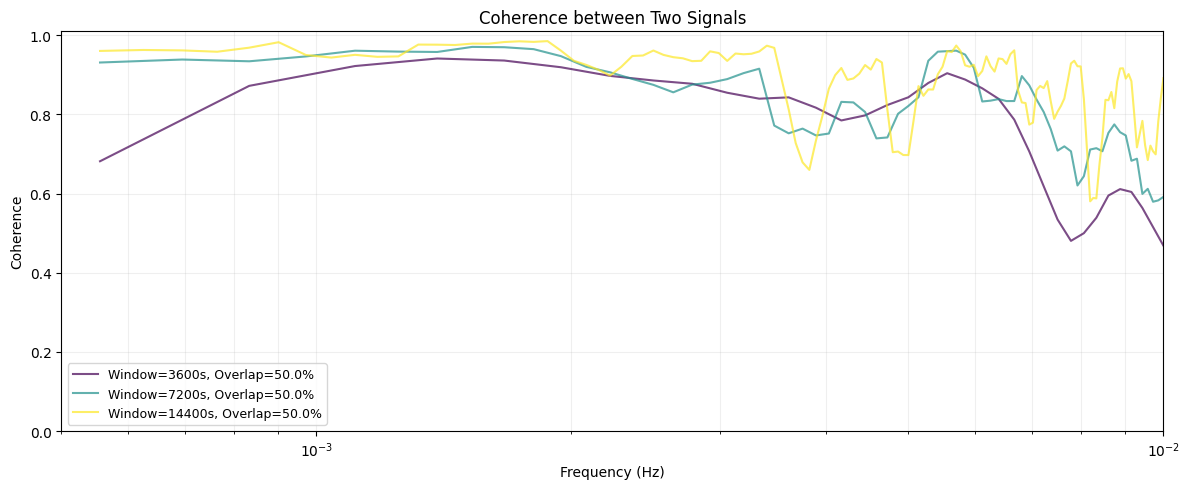

In [47]:
from src.utils.coherence import compute_coherence_windows

# Generate test data
fs = 1.0
data1 = bs.st.select(channel="*DO")[0].data
data2 = bs.st.select(channel="*AN")[0].data

# Multiple windows and overlaps
result = compute_coherence_windows(
    data1, data2, fs,
    window_sec=[3600, 7200, 14400],
    overlap=[0.5],
    plot=True,
    fmin=fmin,
    fmax=fmax,
    smooth=5,
    figsize=(12, 5)
)

# Generate test data
fs = 1.0
data1 = bs.st.select(channel="*DO")[0].data
data2 = bs.st.select(channel="*AE")[0].data

# Multiple windows and overlaps
result = compute_coherence_windows(
    data1, data2, fs,
    window_sec=[3600, 7200, 14400],
    overlap=[0.5],
    plot=True,
    fmin=fmin,
    fmax=fmax,
    smooth=5,
    figsize=(12, 5)
)

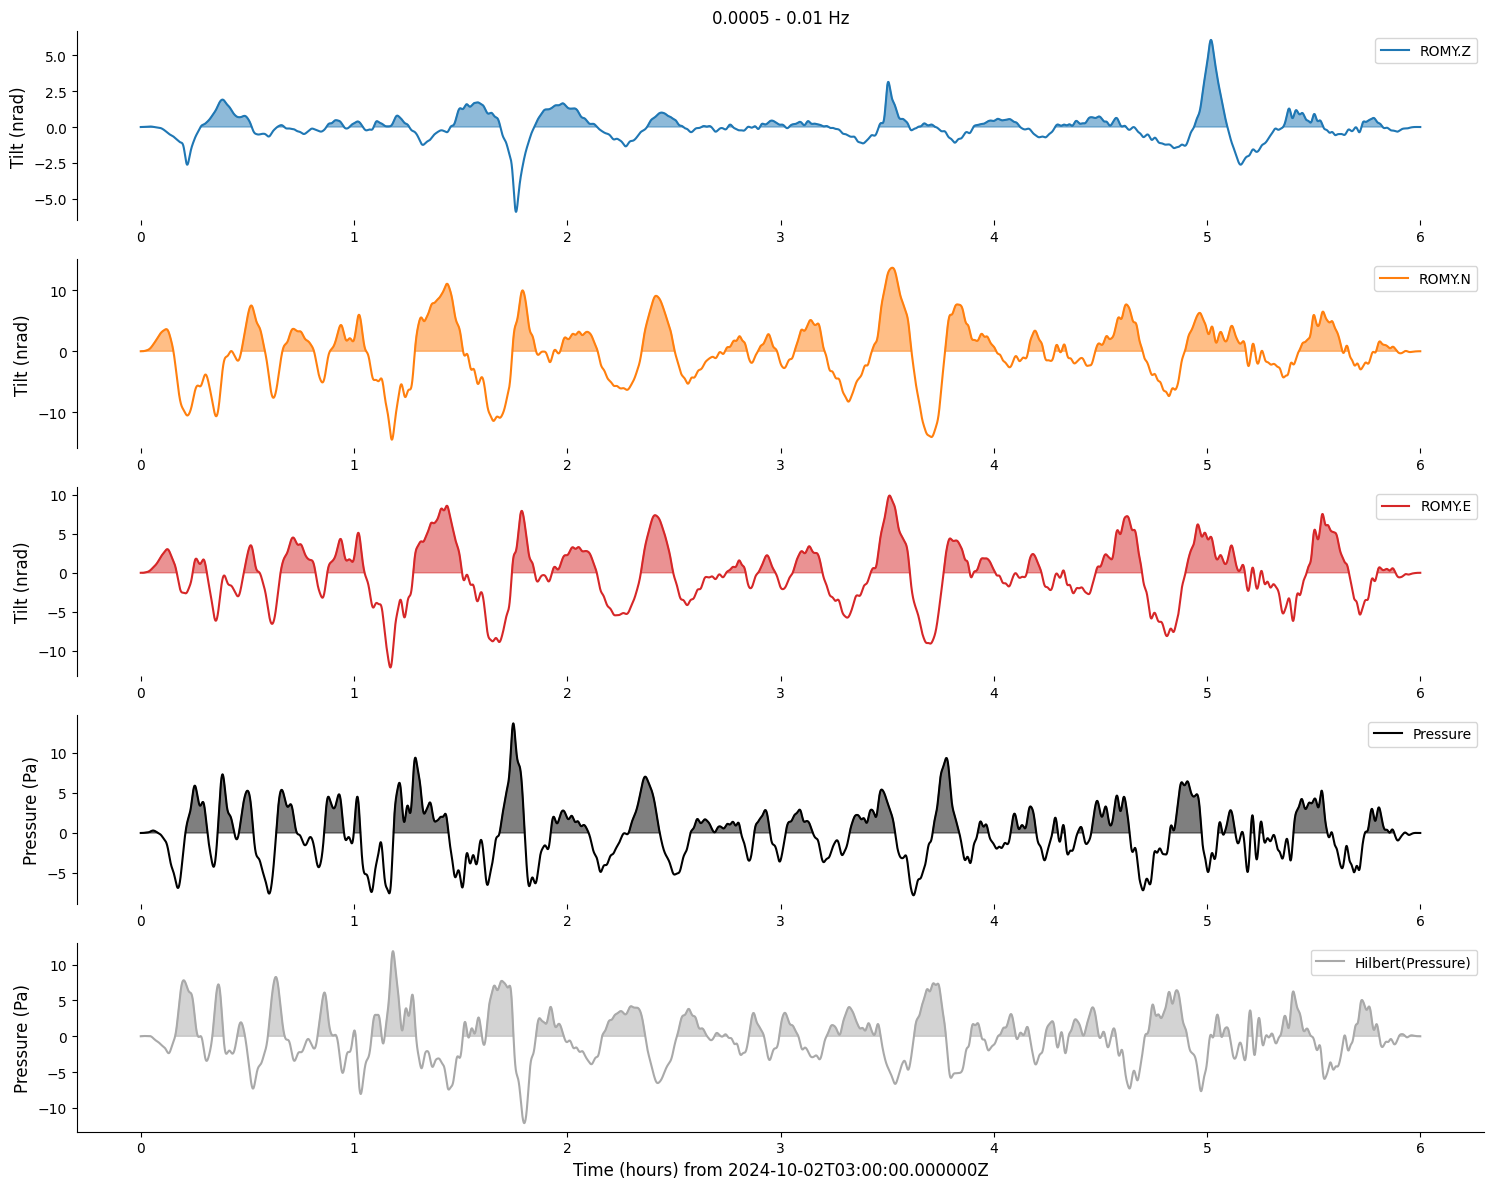

In [30]:
fig = bs.plot_waveforms(bs.st, channel_type=cha, time_unit="hours")

# fig.savefig(f"./figures/{date}/{date}_{sta}_waveforms.png")

Make prediction for tilt


Component N:
P coefficient: 32.431 nrad/hPa
H coefficient: -120.152 nrad/hPa
Variance reduction: 76.7%

Component E:
P coefficient: 38.258 nrad/hPa
H coefficient: -88.641 nrad/hPa
Variance reduction: 76.2%

Component Z:
P coefficient: -3.964 nrad/hPa
H coefficient: -0.372 nrad/hPa
Variance reduction: 1.8%


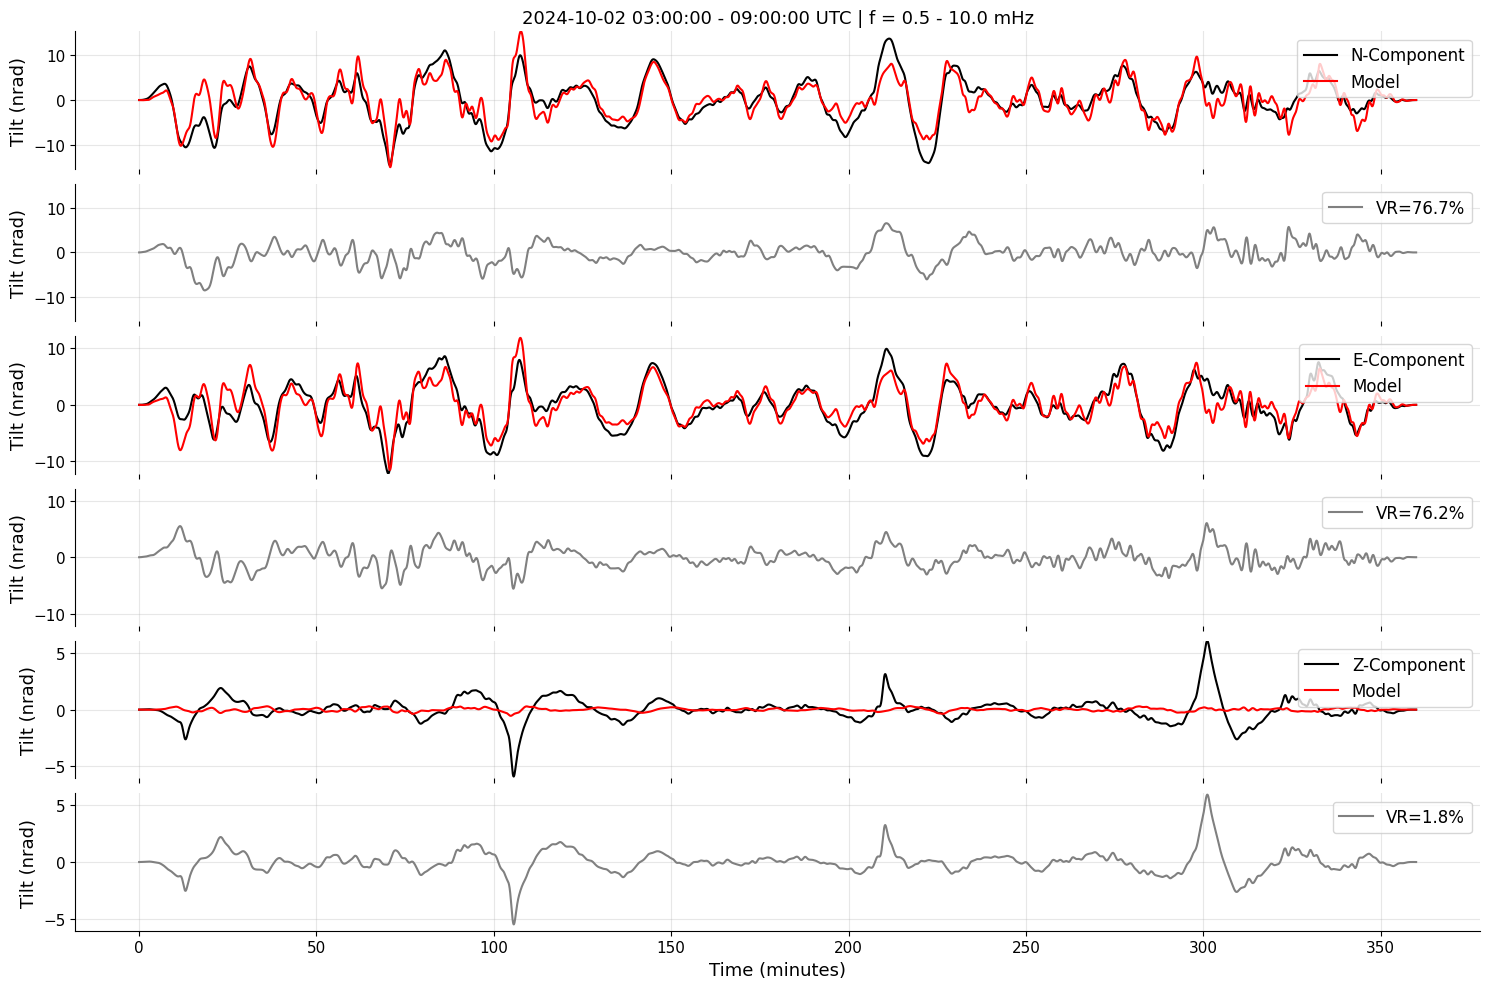

In [14]:

bs.predict_tilt_from_pressure(
    method="least_squares",
    channel_type=cha,
    zero_intercept=True
)

fig = bs.plot_residuals(
    time_unit="minutes",
    channel_type=cha,
    out=True
)

fig.savefig(f"./figures/{date}/{date}_{sta}_{cha}_residual_waveforms.png")


/home/andbro/cursorfiles/baroseis/src/baroseis.py:2368: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


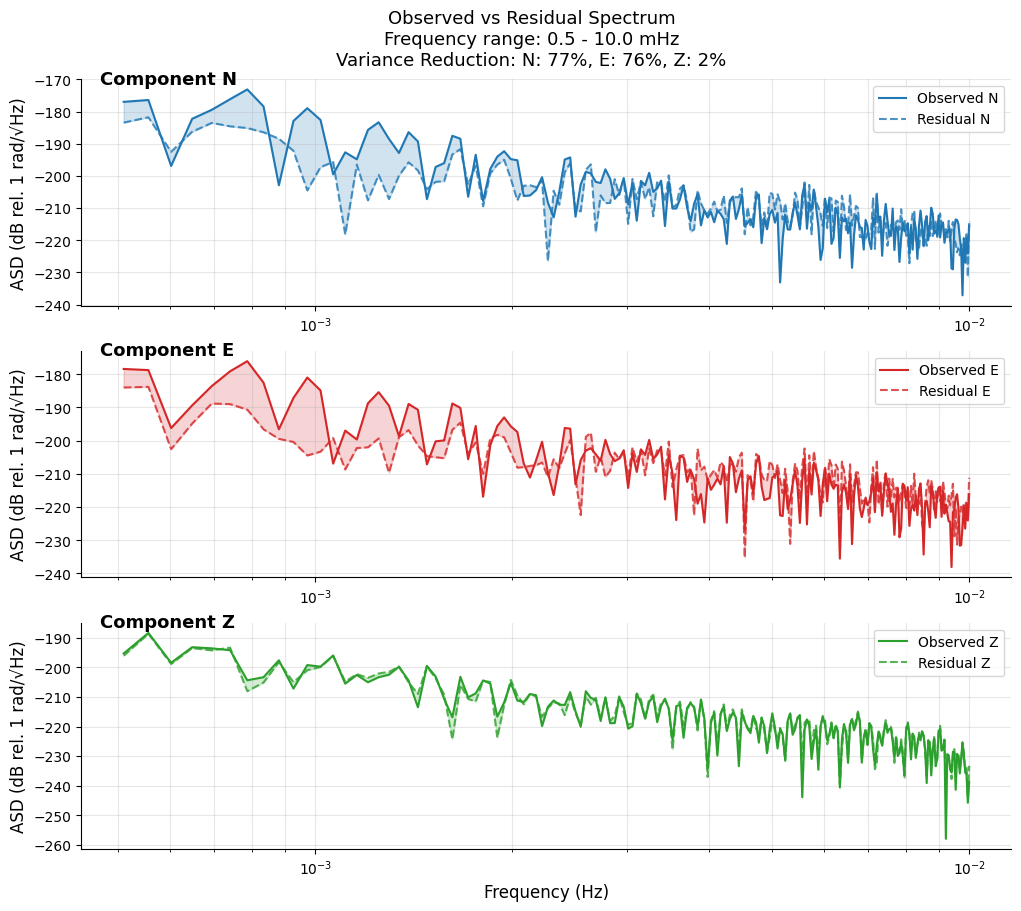

In [15]:

fig = bs.compare_spectra(
    method='fft',
    channel_type=cha,
    fmin=fmin,
    fmax=fmax,
    db_scale=True
)

fig.savefig(f"./figures/{date}/{date}_{sta}_{cha}_residual_spectra.png")


Now we use the rotation rate data to fit it with a model based on the barometric data


Component N:
P coefficient: 0.768 nrad/s/hPa
H coefficient: 0.314 nrad/s/hPa
Variance reduction: 75.3%

Component E:
P coefficient: -0.547 nrad/s/hPa
H coefficient: -0.352 nrad/s/hPa
Variance reduction: 66.2%

Component Z:
P coefficient: -0.014 nrad/s/hPa
H coefficient: -0.018 nrad/s/hPa
Variance reduction: 1.0%


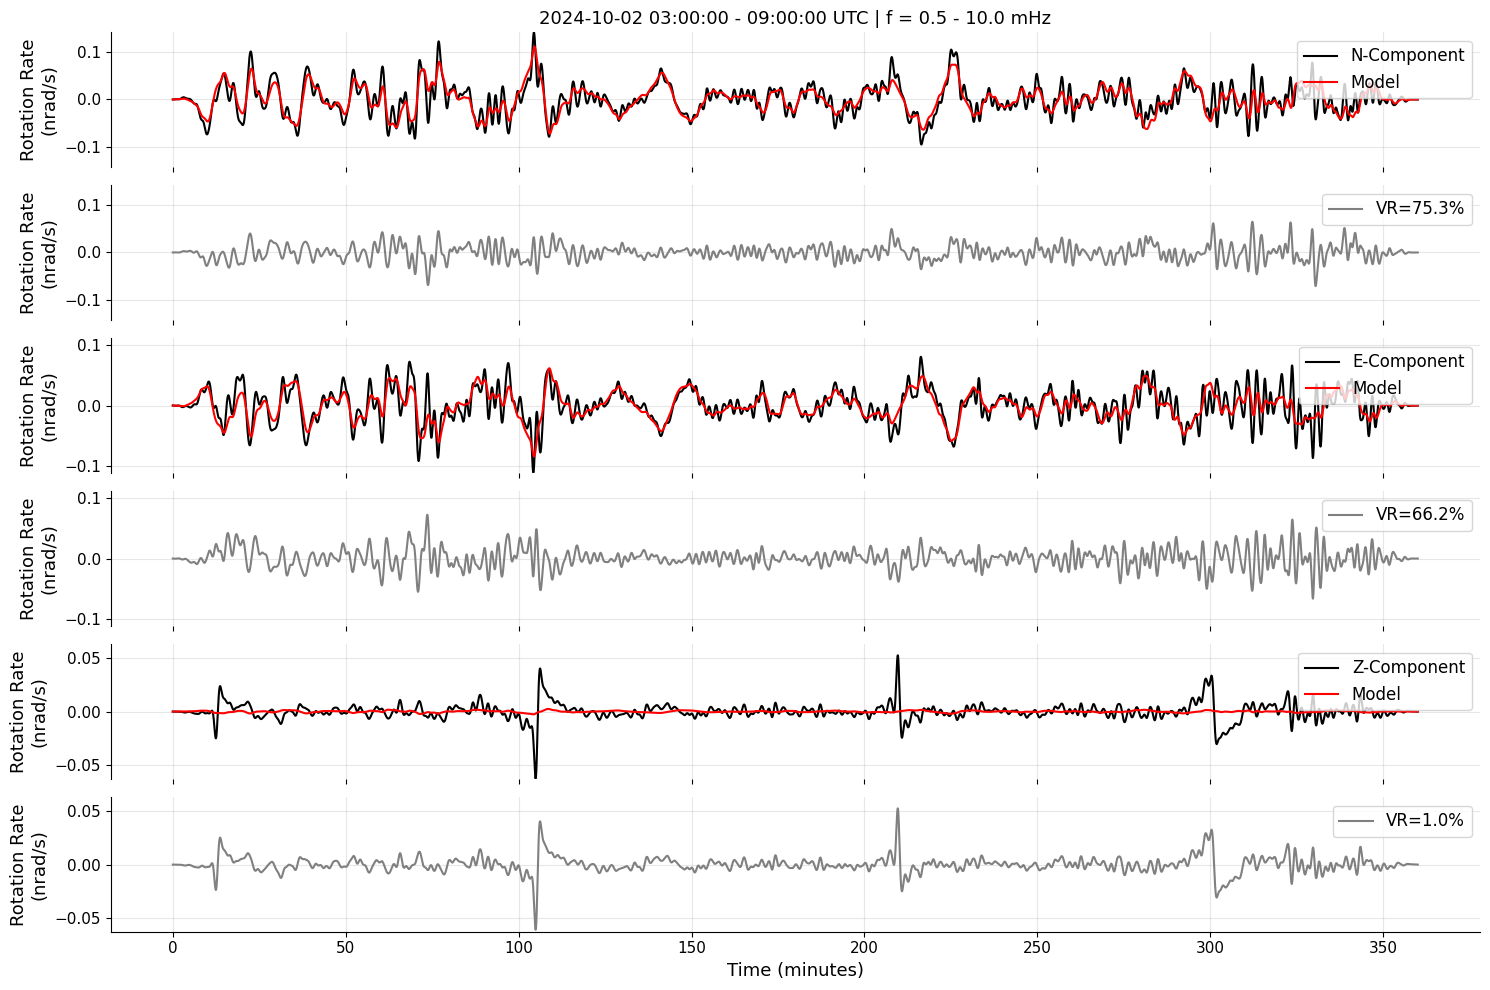

In [16]:
cha = "J"


bs.predict_tilt_from_pressure(
    method="least_squares",
    channel_type=cha,
    zero_intercept=True
)

fig = bs.plot_residuals(
    time_unit="minutes",
    channel_type=cha,
    out=True
)

fig.savefig(f"./figures/{date}/{date}_{sta}_{cha}_residual_waveforms.png")


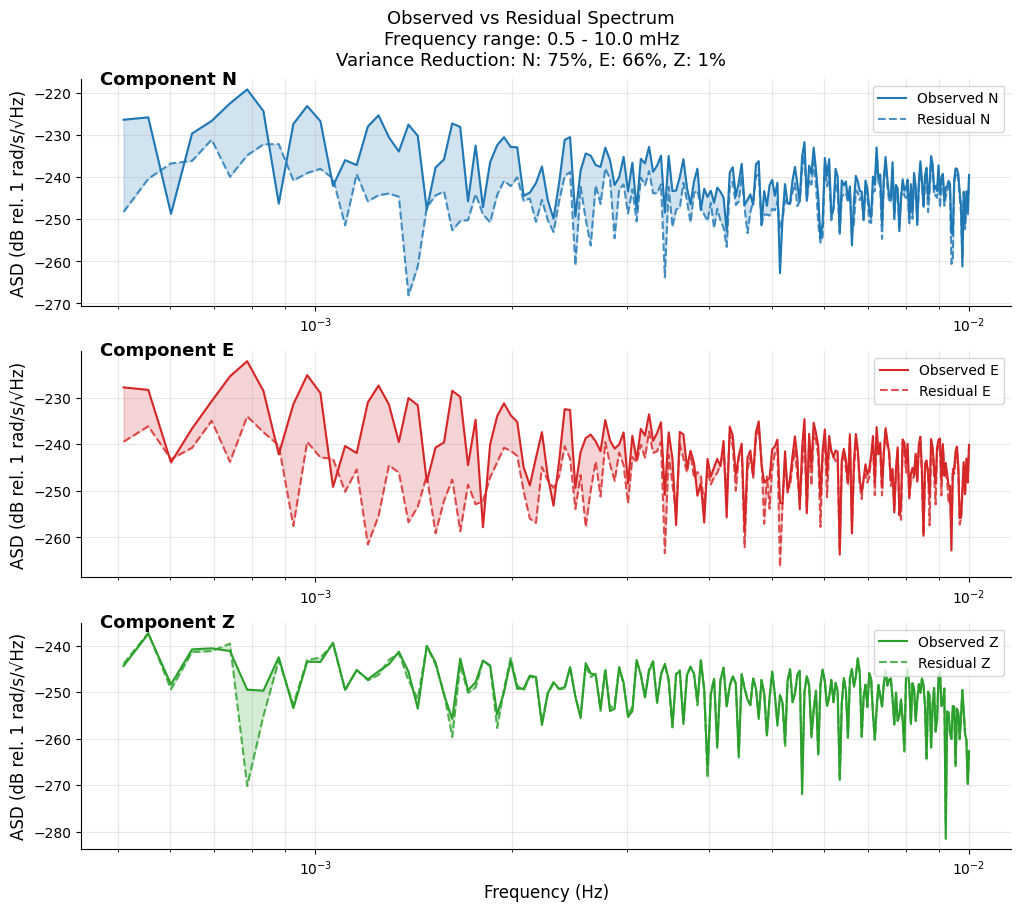

In [17]:

fig = bs.compare_spectra(
    method='fft',
    channel_type=cha,
    fmin=fmin,
    fmax=fmax,
    db_scale=True,
)

fig.savefig(f"./figures/{date}/{date}_{sta}_{cha}_residual_spectra.png")


### With Pressure Derivative

Now take the barometric derivatives and use them for modeling the rotation rate


Component N (with derivatives):
P coefficient: 28.178 nrad/hPa
H coefficient: -162.243 nrad/hPa
DP coefficient: 4932.841 nrad/hPa/s
DH coefficient: -493.998 nrad/hPa/s
Variance reduction: 83.1%

Component E (with derivatives):
P coefficient: 34.532 nrad/hPa
H coefficient: -123.003 nrad/hPa
DP coefficient: 4027.011 nrad/hPa/s
DH coefficient: -433.051 nrad/hPa/s
Variance reduction: 83.3%

Component Z (with derivatives):
P coefficient: -6.286 nrad/hPa
H coefficient: -3.059 nrad/hPa
DP coefficient: 314.760 nrad/hPa/s
DH coefficient: -271.153 nrad/hPa/s
Variance reduction: 2.8%


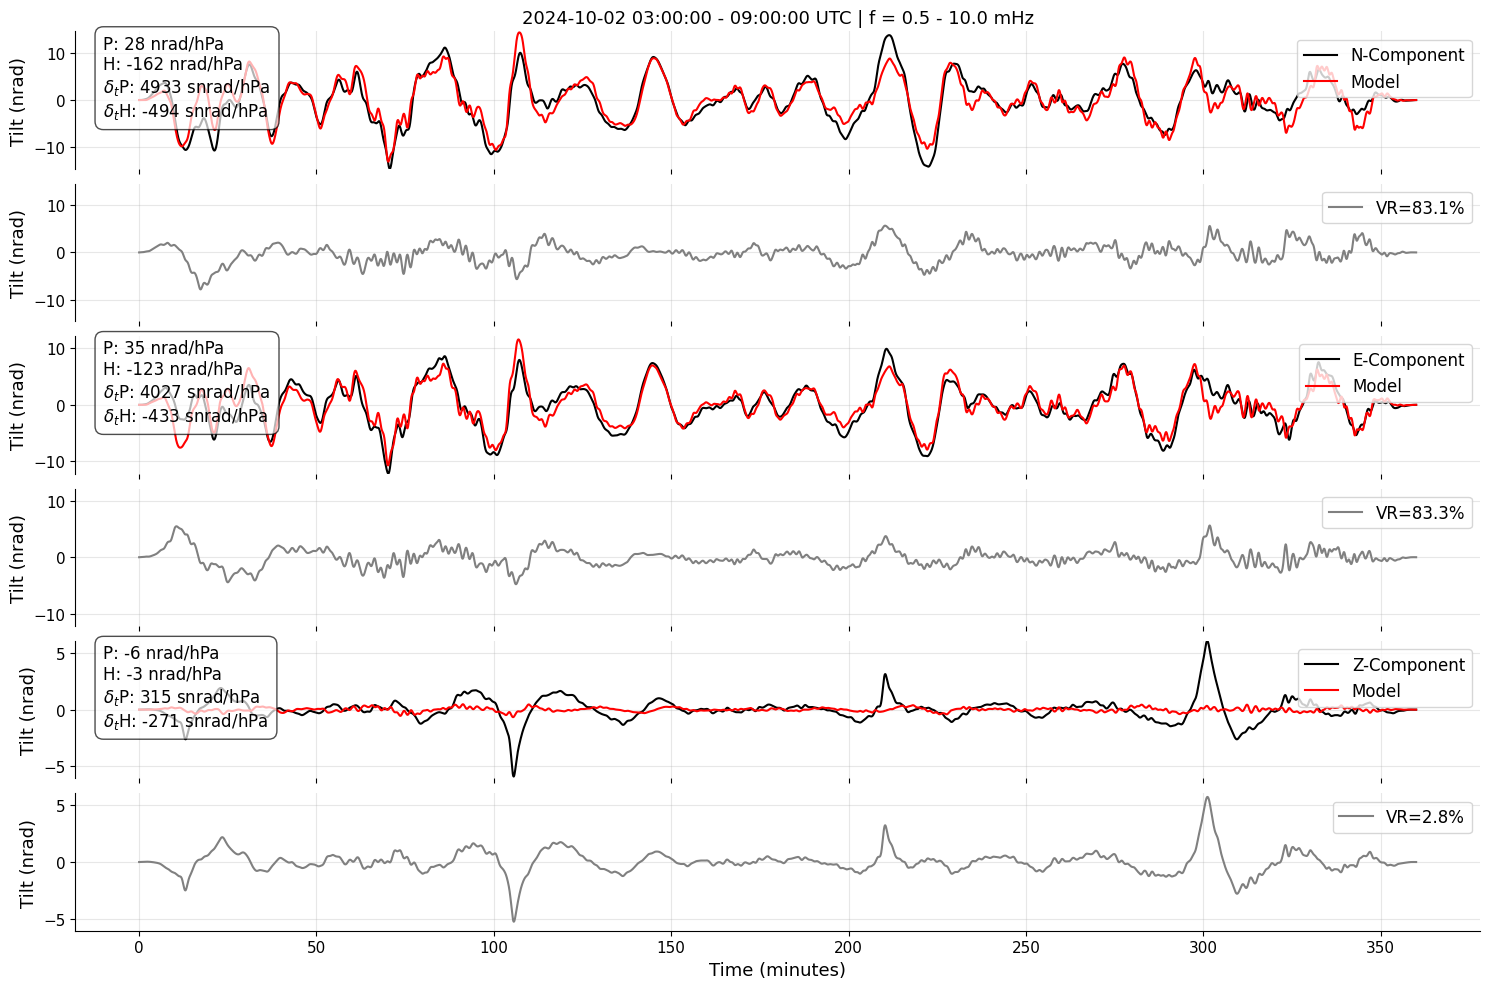

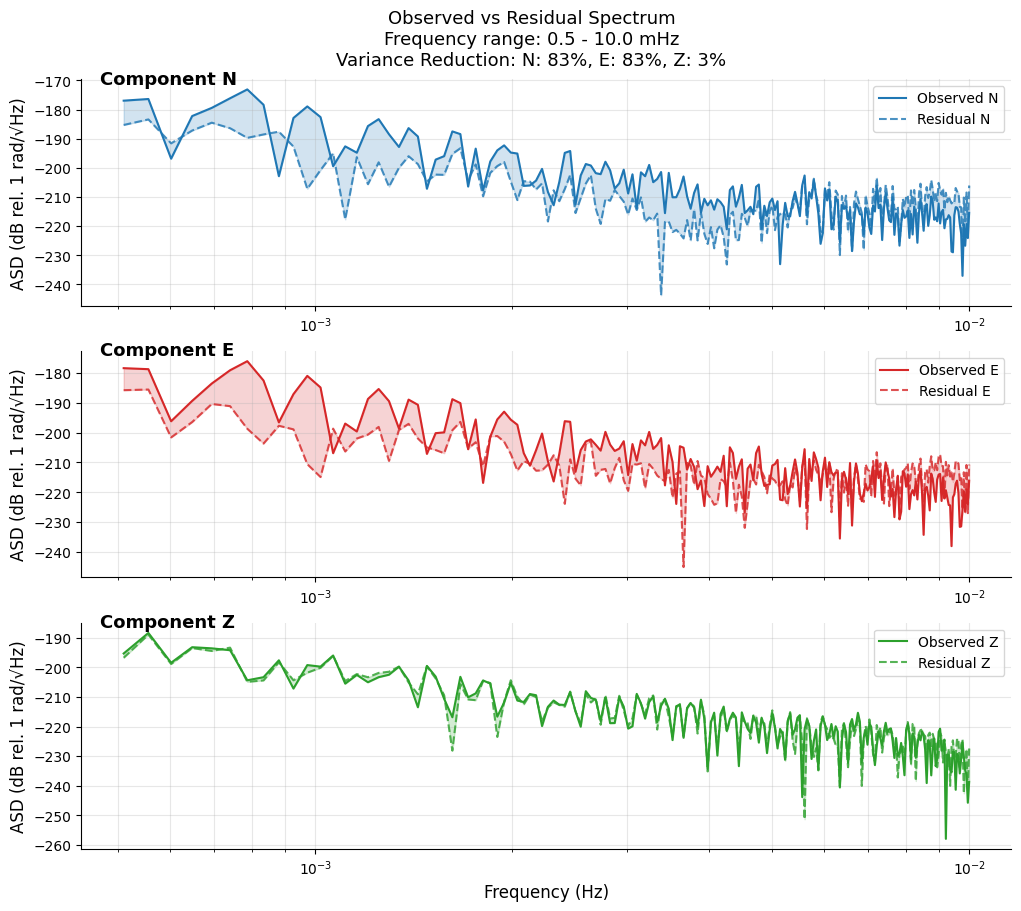

In [18]:
cha = "A"

bs.model_tilt_from_pressure(
    method="least_squares",
    channel_type=cha,  # for rotation rate
    zero_intercept=True,
    verbose=True,
)

fig = bs.plot_residuals_derivatives(
    channel_type=cha,
    out=True
)

fig = bs.compare_spectra(
    method='fft',
    channel_type=cha,
    fmin=fmin,
    fmax=fmax,
    db_scale=True,
)


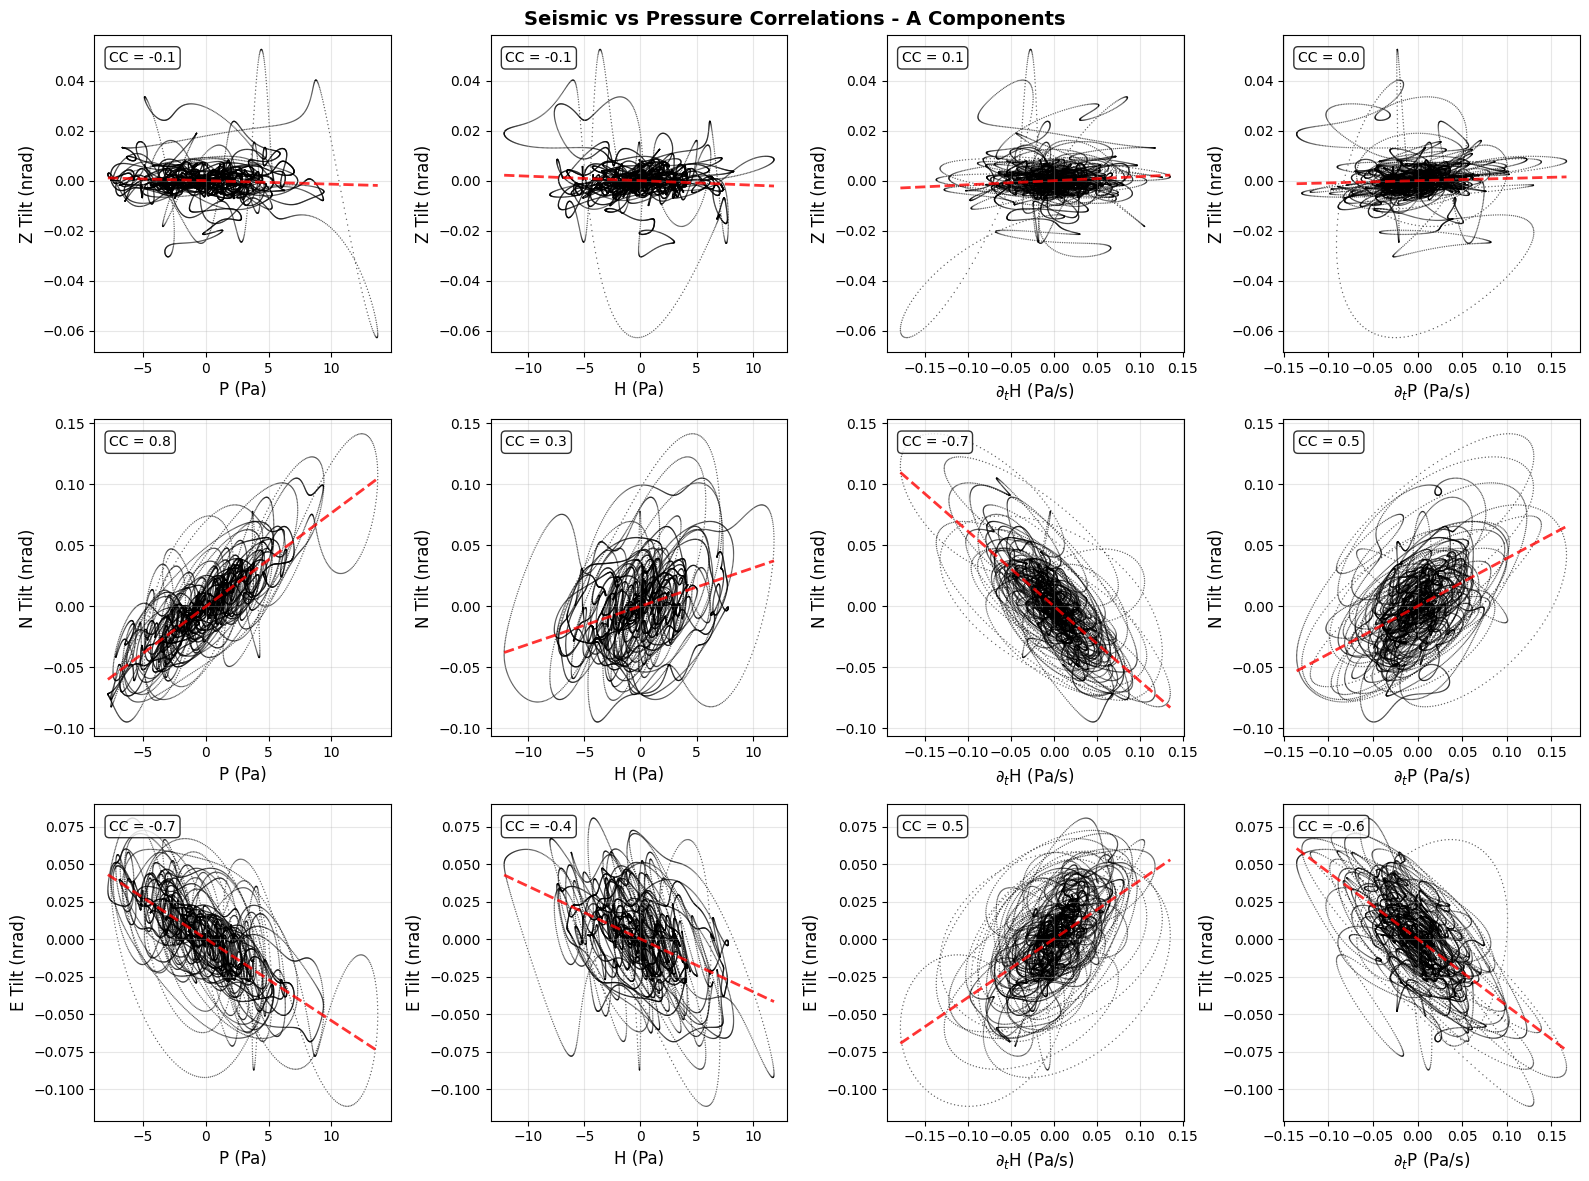

In [19]:

fig = bs.plot_scatter_correlations(channel_type=cha, out=True)

fig.savefig(f"./figures/{date}/{date}_{sta}_{cha}_scatter_correlations.png")

## TESTS

In [20]:
# _st = bs.st.copy()
# # plt.plot(_st.select(channel="BDO")[0].data)
# for tr in _st:
#     if tr.stats.channel[1] == "D":
#         print(tr.stats.channel)
#         tr = tr.differentiate()
#     if "PP" in tr.stats.location:
#         _st.remove(tr)

# # plt.plot(_st.select(channel="BDO")[0].data)
# bs.st = _st

In [21]:
# bs.predict_tilt_from_pressure(
#     method="least_squares",
#     channel_type="J",
#     zero_intercept=True
# )

# fig = bs.plot_residuals(
#     time_unit="minutes",
#     channel_type="J",
#     out=True
# )

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_J_dev_residual_waveforms.png")

# fig = bs.compare_spectra(
#     method='fft',
#     channel_type='J',
#     fmin=0.0005,
#     fmax=0.01,
#     db_scale=True,
# )

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_J_dev_residual_spectra.png")
